In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df_2015 = pd.read_csv("../data/2015.csv")
df_2016 = pd.read_csv("../data/2016.csv")
df_2017 = pd.read_csv("../data/2017.csv")
df_2018 = pd.read_csv("../data/2018.csv")
df_2019 = pd.read_csv("../data/2019.csv")

In [16]:
print("Columns 2015: ", df_2015.columns, "\n")
print("Columns 2016: ", df_2016.columns, "\n")
print("Columns 2017: ", df_2017.columns, "\n")
print("Columns 2018: ", df_2018.columns, "\n")
print("Columns 2019: ", df_2019.columns)

Columns 2015:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

Columns 2016:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

Columns 2017:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 

Columns 2018:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita

In [275]:
print("2015: ", df_2015.shape)
print("2016: ", df_2016.shape)
print("2017: ", df_2017.shape)
print("2018: ", df_2018.shape)
print("2019: ", df_2019.shape)

2015:  (158, 12)
2016:  (157, 13)
2017:  (155, 12)
2018:  (156, 9)
2019:  (156, 9)


In [216]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       157 non-null    object 
 1   Region                        157 non-null    object 
 2   Happiness Rank                157 non-null    int64  
 3   Score                         157 non-null    float64
 4   Lower Confidence Interval     157 non-null    float64
 5   Upper Confidence Interval     157 non-null    float64
 6   GDP per capita                157 non-null    float64
 7   Social support                157 non-null    float64
 8   Healthy life expectancy       157 non-null    float64
 9   Freedom to make life choices  157 non-null    float64
 10  Perceptions of corruption     157 non-null    float64
 11  Generosity                    157 non-null    float64
 12  Dystopia Residual             157 non-null    float64
 13  year 

In [209]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       155 non-null    object 
 1   Happiness Rank                155 non-null    int64  
 2   Score                         155 non-null    float64
 3   Whisker high                  155 non-null    float64
 4   Whisker low                   155 non-null    float64
 5   GDP per capita                155 non-null    float64
 6   Social support                155 non-null    float64
 7   Healthy life expectancy       155 non-null    float64
 8   Freedom to make life choices  155 non-null    float64
 9   Generosity                    155 non-null    float64
 10  Perceptions of corruption     155 non-null    float64
 11  Dystopia Residual             155 non-null    float64
 12  year                          155 non-null    int64  
 13  Regio

In [210]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Happiness Rank                156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
 9   year                          156 non-null    int64  
 10  Region                        154 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 13.5+ KB


In [211]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Happiness Rank                156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   year                          156 non-null    int64  
 10  Region                        152 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 13.5+ KB


In [88]:
null = {
    'df_2015': df_2015.isna().sum(),
    'df_2016': df_2016.isna().sum(),
    'df_2017': df_2017.isna().sum(),
    'df_2018': df_2018.isna().sum(),
    'df_2019': df_2019.isna().sum(),
}

for name, summary in null.items():
    print("---------------------------------")
    print(f"Null Values {name}:\n---------------------------------\n{summary[summary > 0]}\n")

---------------------------------
Null Values df_2015:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2016:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2017:
---------------------------------
Series([], dtype: int64)

---------------------------------
Null Values df_2018:
---------------------------------
Perceptions of corruption    1
dtype: int64

---------------------------------
Null Values df_2019:
---------------------------------
Series([], dtype: int64)



In [157]:
nan_records = df_2018[df_2018.isna().any(axis=1)]
nan_records

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [3]:
nan_record_index = df_2018[df_2018.isna().any(axis=1)].index
df_2018.drop(nan_record_index, inplace=True)

In [4]:
# 2015
df_2015.rename(columns={
    'Happiness Rank': 'Happiness Rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual' 
}, inplace=True)
df_2015['Year'] = 2015

# 2016
df_2016.rename(columns={
    'Happiness Rank': 'Happiness Rank',
    'Happiness Score': 'Score',
    'Lower Confidence Interval': 'Lower Confidence Interval',
    'Upper Confidence Interval': 'Upper Confidence Interval',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual'
}, inplace=True)
df_2016['Year'] = 2016

#2017
df_2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Score',
    'Whisker.high': 'Whisker high',
    'Whisker.low': 'Whisker low',
    'Economy..GDP.per.Capita.': 'Economy',
    'Family': 'Social support',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Generosity': 'Generosity',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Dystopia.Residual': 'Dystopia Residual'
}, inplace=True)
df_2017['Year'] = 2017

#2018
df_2018.rename(columns={
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Score',
    'GDP per capita': 'Economy',
    'Social support': 'Social support',
    'Healthy life expectancy': 'Healthy life expectancy',
    'Freedom to make life choices': 'Freedom to make life choices',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions of corruption'
}, inplace=True)
df_2018['Year'] = 2018

#2019
df_2019.rename(columns={
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Score',
    'GDP per capita': 'Economy',
    'Social support': 'Social support',
    'Healthy life expectancy': 'Healthy life expectancy',
    'Freedom to make life choices': 'Freedom to make life choices',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Perceptions of corruption'
}, inplace=True)
df_2019['Year'] = 2019


In [5]:
region_dict_2016 = df_2016[['Country', 'Region']].drop_duplicates().set_index('Country').to_dict()['Region']

df_2017['Region'] = pd.NA
df_2018['Region'] = pd.NA
df_2019['Region'] = pd.NA

df_2017['Region'] = df_2017['Region'].fillna(df_2017['Country'].map(region_dict_2016))
df_2018['Region'] = df_2018['Region'].fillna(df_2018['Country'].map(region_dict_2016))
df_2019['Region'] = df_2019['Region'].fillna(df_2019['Country'].map(region_dict_2016))

df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [6]:
df.isna().sum()

Country                           0
Region                           18
Happiness Rank                    0
Score                             0
Standard Error                  623
Economy                           0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         0
Generosity                        0
Dystopia Residual               311
Year                              0
Lower Confidence Interval       624
Upper Confidence Interval       624
Whisker high                    626
Whisker low                     626
dtype: int64

In [176]:
columns_2015 = set(df_2015.columns)
columns_2016 = set(df_2016.columns)
columns_2017 = set(df_2017.columns)
columns_2018 = set(df_2018.columns)
columns_2019 = set(df_2019.columns)

common_columns = columns_2015 & columns_2016 & columns_2017 & columns_2018 & columns_2019

print("Common columns:", common_columns)

Common columns: {'Score', 'Happiness Rank', 'Healthy life expectancy', 'Social support', 'Country', 'Economy', 'Generosity', 'Year', 'Freedom to make life choices', 'Region', 'Perceptions of corruption'}


In [7]:
common_columns = ['Score', 'Happiness Rank', 'Healthy life expectancy', 'Social support', 
                  'Country', 'Economy', 'Generosity', 'Year', 
                  'Freedom to make life choices', 'Region', 'Perceptions of corruption']

df_2015 = df_2015[common_columns]
df_2016 = df_2016[common_columns]
df_2017 = df_2017[common_columns]
df_2018 = df_2018[common_columns]
df_2019 = df_2019[common_columns]


df = pd.concat([df_2015, df_2016, df_2017,df_2018, df_2019], ignore_index=True)

region_mapping = {
    'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Mozambique': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Western Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa',
    'Swaziland': 'Sub-Saharan Africa'
}

df['Region'] = df['Region'].fillna(df['Country'].map(region_mapping))
                

In [8]:
df

,Score,Happiness Rank,Healthy life expectancy,Social support,Country,Economy,Generosity,Year,Freedom to make life choices,Region,Perceptions of corruption
0,7.587,1,0.94143,1.34951,Switzerland,1.39651,0.29678,2015,0.66557,Western Europe,0.41978
1,7.561,2,0.94784,1.40223,Iceland,1.30232,0.43630,2015,0.62877,Western Europe,0.14145
2,7.527,3,0.87464,1.36058,Denmark,1.32548,0.34139,2015,0.64938,Western Europe,0.48357
3,7.522,4,0.88521,1.33095,Norway,1.45900,0.34699,2015,0.66973,Western Europe,0.36503
4,7.427,5,0.90563,1.32261,Canada,1.32629,0.45811,2015,0.63297,North America,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
776,3.334,152,0.61400,0.71100,Rwanda,0.35900,0.21700,2019,0.55500,Sub-Saharan Africa,0.41100
777,3.231,153,0.49900,0.88500,Tanzania,0.47600,0.27600,2019,0.41700,Sub-Saharan Africa,0.14700
778,3.203,154,0.36100,0.51700,Afghanistan,0.35000,0.15800,2019,0.00000,Southern Asia,0.02500
779,3.083,155,0.10500,0.00000,Central African Republic,0.02600,0.23500,2019,0.22500,Sub-Saharan Africa,0.03500


In [9]:
df.isna().sum()

Score                           0
Happiness Rank                  0
Healthy life expectancy         0
Social support                  0
Country                         0
Economy                         0
Generosity                      0
Year                            0
Freedom to make life choices    0
Region                          0
Perceptions of corruption       0
dtype: int64

In [151]:
df.dtypes

Score                           float64
Happiness Rank                    int64
Healthy life expectancy         float64
Social support                  float64
Country                          object
Economy                         float64
Generosity                      float64
Year                              int64
Freedom to make life choices    float64
Region                           object
Perceptions of corruption       float64
dtype: object

In [13]:
score = df.pop('Score')
df['Score'] = score

In [15]:
df.to_csv('../data/data_clean.csv', index=False)

---

In [135]:
df = pd.get_dummies(df, columns=['Country', 'Region'], drop_first=True)

In [136]:
df.drop(columns=['Happiness Rank'], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

In [ ]:
df.drop(columns=['Country', 'Happiness Rank'], axis=1, inplace=True)

In [137]:
X = df.drop(columns=['Score'])  # Independent Variables
y = df['Score']  # Dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

Mean Squared Error: 0.152895833727861
R^2: 0.8775551286407441


---

In [196]:
df_ml = df.copy()
df_ml = pd.get_dummies(df_ml, columns=['Region'], drop_first=True)
df_ml.drop(columns=['Country', 'Happiness Rank'], axis=1, inplace=True)

X = df_ml.drop('Score', axis=1)
y = df_ml['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}')
    r2 = r2_score(y_test, y_pred)
    print(f'R^2: {r2}')

Linear Regression - MSE: 0.28
R^2: 0.7729014132455543
Random Forest - MSE: 0.22
R^2: 0.8209032216729837
Gradient Boosting - MSE: 0.23
R^2: 0.8114301661718317


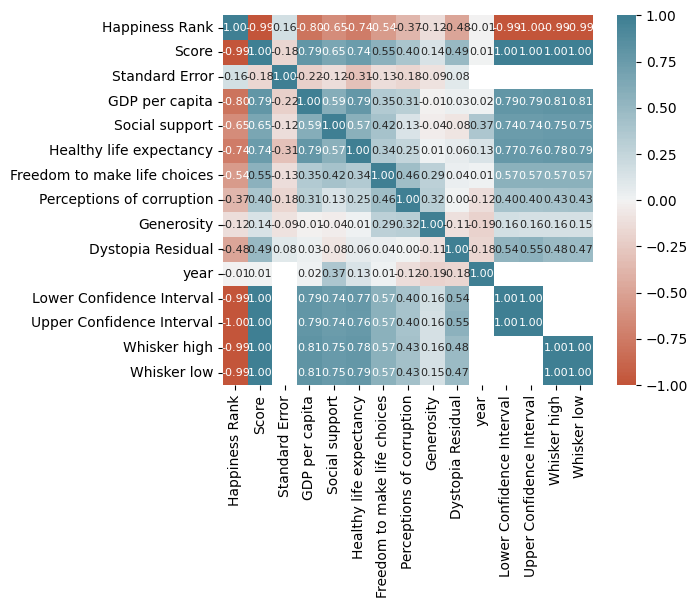

In [191]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)